In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ratings_all = np.loadtxt('data/data.txt')

In [3]:
## read the movies.txt file, get the list of all movies ids, names, and their genres
movies_all = []
with open('data/movies.txt') as f:
    lines = f.readlines()  
    for line in lines:
        line_items = line.strip('\n').split(';')
        line_items_int_str = []
        for idx in range(len(line_items)):
            if idx == 1:
                line_items_int_str.append(line_items[idx])
            else:
                line_items_int_str.append(int(line_items[idx]))
        movies_all.append(line_items_int_str)

## Basic visualization 2: All ratings of the ten most popular movies (movies which have received the most ratings) 

In [36]:
## find the ten most popular movies, and get their ratings
num_of_ratings_all = np.zeros(len(movies_all))
average_ratings_all = np.zeros(len(movies_all))
hist_ratings_all = np.zeros((len(movies_all), 6))
for rating in ratings_all:
    num_of_ratings_all[int(rating[1])-1] += 1
    average_ratings_all[int(rating[1])-1] += rating[2]
    hist_ratings_all[int(rating[1])-1][int(rating[2])] += 1
average_ratings_all = np.divide(average_ratings_all, num_of_ratings_all)
index_most_popular_10 = num_of_ratings_all.argsort()[-10:][::-1]

most_popular_10 = []
for idx in range(10):
    most_popular_10.append([index_most_popular_10[idx], movies_all[index_most_popular_10[idx]][1], num_of_ratings_all[index_most_popular_10[idx]], average_ratings_all[index_most_popular_10[idx]], hist_ratings_all[index_most_popular_10[idx]]])

print('ten most popular movies: idx, name, num of ratings, average rating, hist of ratings')
print(most_popular_10[0])


ten most popular movies: idx, name, num of ratings, average rating, hist of ratings
[49, 'Star Wars (1977)', 583.0, 4.3584905660377355, array([  0.,   9.,  16.,  57., 176., 325.])]


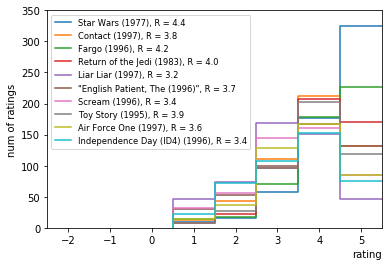

In [72]:
## draw all the ratings of the ten most popular movies
int_ratings = [0.5,1.5,2.5,3.5,4.5,5.5]

for idx in range(10):
    plt.step(int_ratings, most_popular_10[idx][4], label=most_popular_10[idx][1]+', R = %3.1f'%most_popular_10[idx][3])

plt.legend(fontsize='small',loc='upper left')

plt.xlim(-2.5, 5.5)
plt.ylim(0, 350)
plt.xlabel('rating',horizontalalignment='right', x=1.0)
plt.ylabel('num of ratings')

#plt.show()
plt.savefig('plots/'+'ratings_ten_most_popular_movies.pdf')
plt.savefig('plots/'+'ratings_ten_most_popular_movies.png')